# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project centers on performing a structured exploratory data analysis (EDA) of Uber ride request data to uncover actionable insights that can inform operational and strategic decisions. The dataset, loaded from Uber_Data.csv, includes timestamped ride requests, which are transformed to extract temporal features such as hour and day. These features serve as the foundation for identifying patterns in demand and supply fluctuations.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**
Uber faces significant operational challenges due to mismatches between rider demand and driver availability, particularly during peak hours and at specific pickup locations. These supply-demand gaps lead to increased ride cancellations, longer wait times, and reduced customer satisfaction—ultimately impacting revenue and brand loyalty.

The goal of this project is to analyze Uber ride request data to identify patterns and root causes of these mismatches. By performing structured exploratory data analysis (EDA), we aim to uncover when, where, and why these gaps occur. This includes examining temporal trends (hourly and daily), geographic distribution of requests, and ride statuses (completed, cancelled, or no cars available).

#### **Define Your Business Objective?**

Uber’s ability to deliver reliable, on-demand transportation hinges on efficiently matching rider demand with driver supply. However, recurring gaps—especially during peak hours and at high-traffic pickup points—lead to service disruptions, including cancellations and unfulfilled requests. These inefficiencies not only frustrate customers but also result in lost revenue and diminished brand trust.

This project aims to transform raw ride request data into strategic insights that can guide operational improvements. By analyzing temporal patterns, geographic trends, and ride outcomes, we seek to identify the root causes of supply-demand mismatches.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [8]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import random
from wordcloud import WordCloud
import ast
import statsmodels as stat


### Dataset Loading

In [10]:
# Load Dataset
df = pd.read_csv('Uber_Data.csv') 
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['hour'] = df['Request timestamp'].dt.hour
df['day'] = df['Request timestamp'].dt.date


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19544\2255662149.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])


### Dataset First View

In [11]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/07/16 13:00,11,2016-11-07
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/07/16 18:47,17,2016-11-07
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/07/16 9:58,9,2016-12-07
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/07/16 22:03,21,2016-12-07
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,13/07/16 9:25,8,2016-07-13


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
df.shape

(6745, 8)

### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
 6   hour               6745 non-null   int32         
 7   day                6745 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 395.3+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
hour                    0
day                     0
dtype: int64

<Axes: >

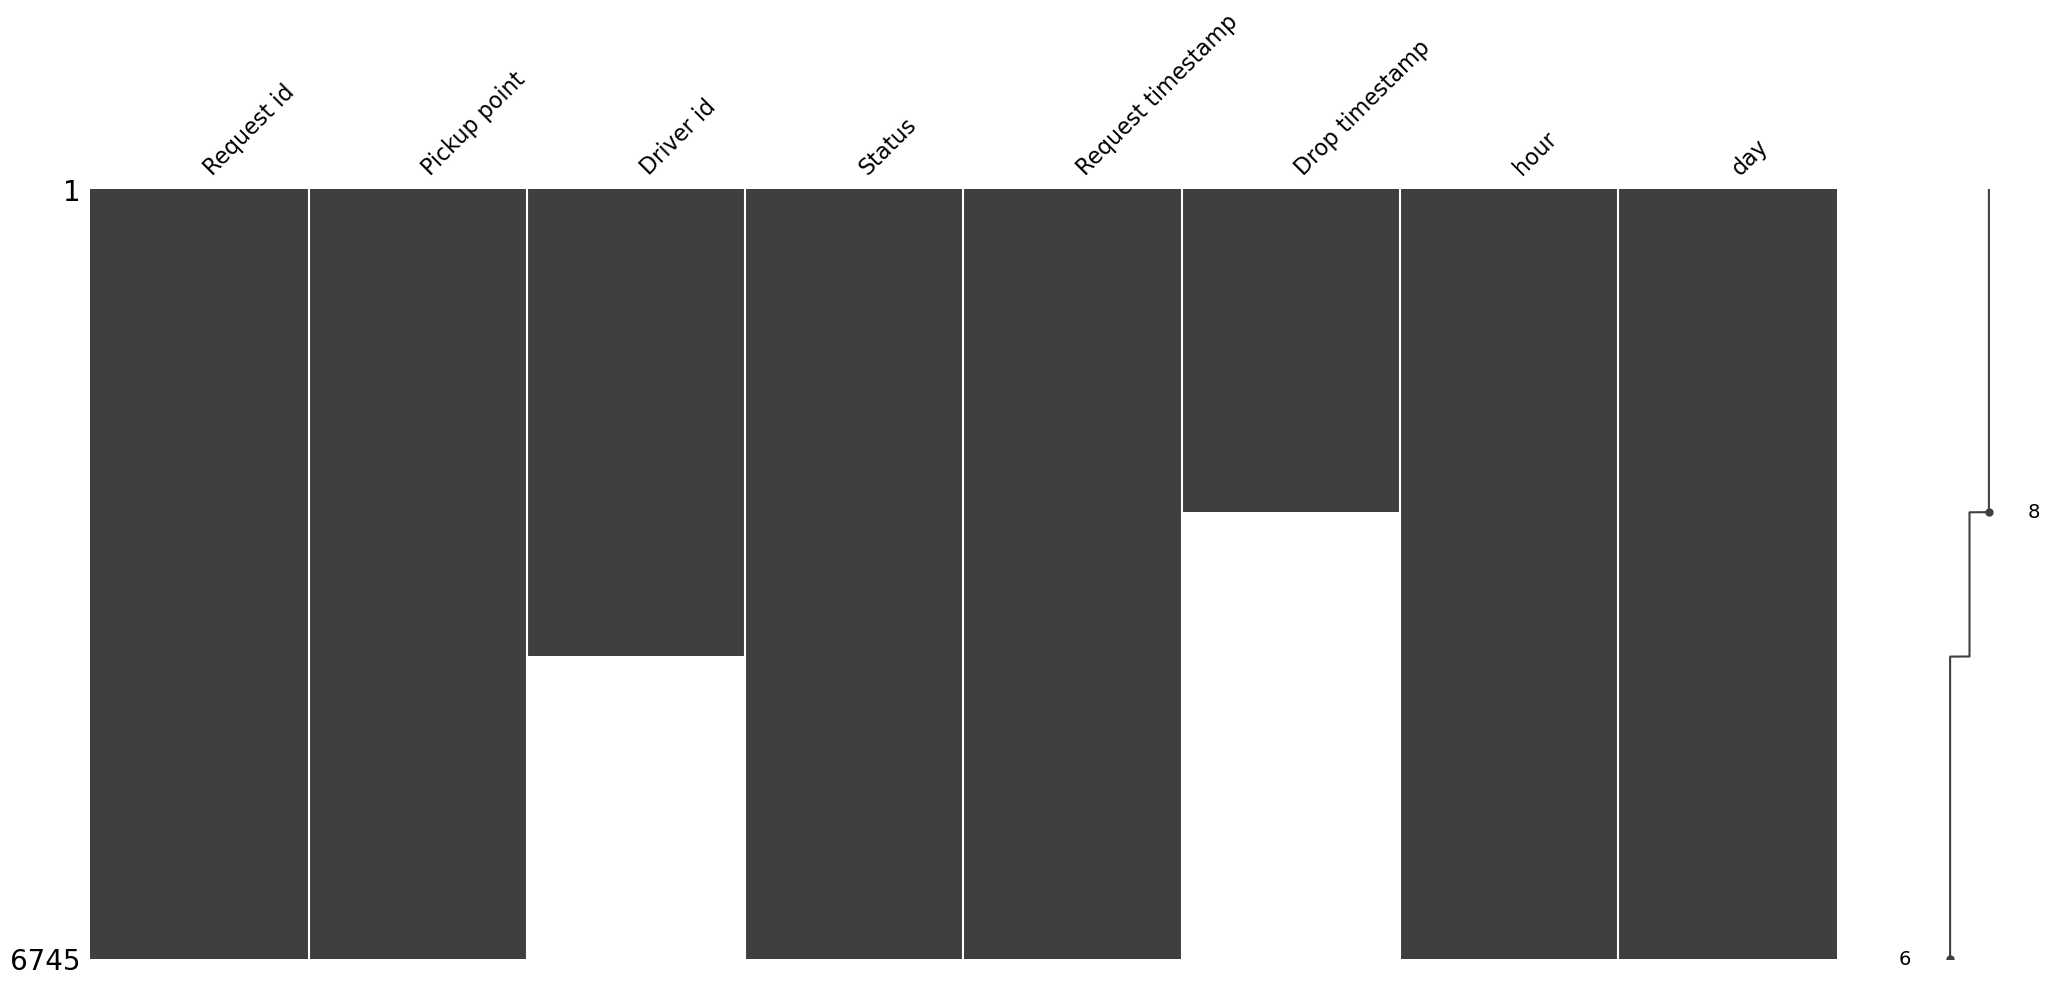

In [17]:
# Visualizing the missing values
!pip install missingno
import missingno as msno
msno.matrix(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'hour', 'day'],
      dtype='object')

In [20]:
# Dataset Describe
df.describe

<bound method NDFrame.describe of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp  Drop timestamp  hour         day  
0    2016-11-07 11:51:00  11/07/16 13:00    11  2016-11-07  
1    2016-11-07 17:57:00  11/07/16 18:47    17  2016-11-07  
2    2016-12-07 09:17:00  

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
df.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    4016
Drop timestamp       2282
hour                   24
day                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.
#Checking null values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
hour                    0
day                     0
dtype: int64

In [27]:
df.fillna({"Driver id":"Not Available"},inplace=True)

In [25]:
df.fillna({"Drop timestamp":"Not Available"},inplace=True)

In [28]:
df.isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
hour                 0
day                  0
dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

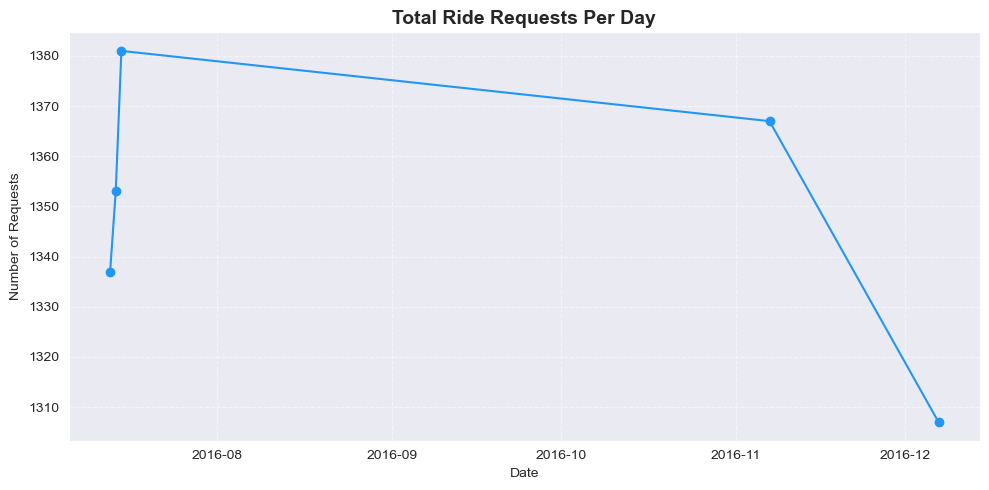

In [35]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 5))
df.groupby('day').size().plot(kind='line', marker='o', color='#2196F3')
plt.title('Total Ride Requests Per Day', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for visualizing trends over time. Since the x-axis represents sequential dates and the y-axis shows the number of ride requests, this format clearly captures fluctuations, patterns, and anomalies in daily demand. The use of markers enhances readability by pinpointing exact data points, making it easier to identify peaks and troughs.

##### 2. What is/are the insight(s) found from the chart?

There are visible spikes and dips in ride requests across different days, indicating uneven demand.

Certain days show consistently higher request volumes, possibly aligning with weekdays or specific events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Uber can use this trend to forecast daily demand and proactively adjust driver availability.
High-demand days can be targeted for driver incentives, ensuring better coverage and reducing cancellations.
Potential Negative Growth:
Days with low request volume may lead to driver idle time, reducing operational efficiency.
If high-demand days are not matched with adequate supply, it could result in unfulfilled requests, damaging customer trust.

#### Chart - 2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19544\3848121622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')


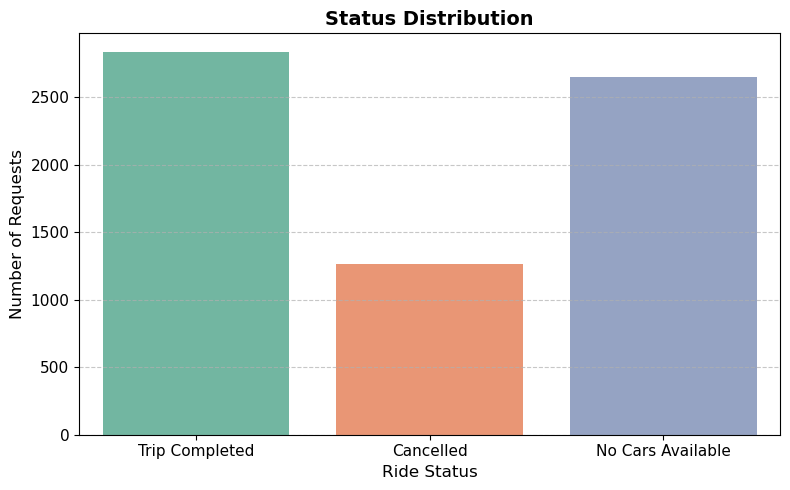

In [33]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Ride Status', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A countplot is perfect for comparing categorical values like ride statuses. It clearly shows how many requests fall into each category—Completed, Cancelled, or No Cars Available

##### 2. What is/are the insight(s) found from the chart?

A large portion of rides are either Cancelled or marked as No Cars Available.
Completed rides are fewer than expected, indicating service inefficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Highlights operational gaps that can be fixed—targeted driver deployment and better customer communication. 
Negative: High cancellation and unavailability rates hurt customer trust and revenue.

#### Chart - 3

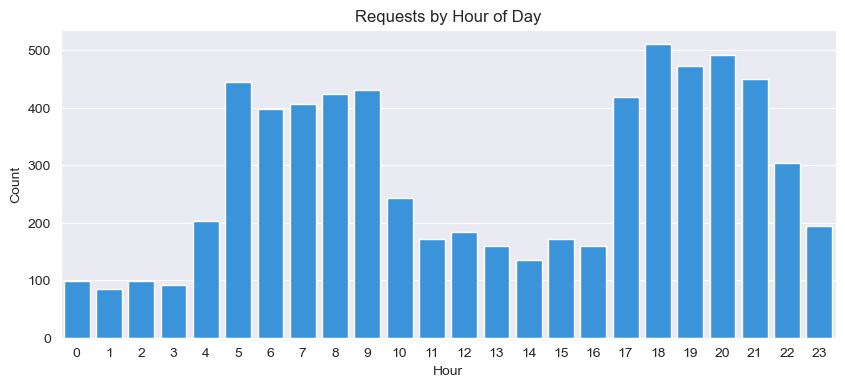

In [36]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=df, color='#2196F3')
plt.title('Requests by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

A countplot is ideal for showing frequency distribution across discrete time intervals. It clearly illustrates how ride requests vary by hour, helping identify peak and off-peak periods..

##### 2. What is/are the insight(s) found from the chart?

Demand spikes during morning (7–9 AM) and evening (5–9 PM) hours.
Late-night and early-morning hours show minimal activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Enables Uber to optimize driver shifts around peak hours, improving ride fulfillment. 
Negative: If supply isn’t scaled during high-demand hours, it may lead to unmet requests and cancellations.

#### Chart - 4

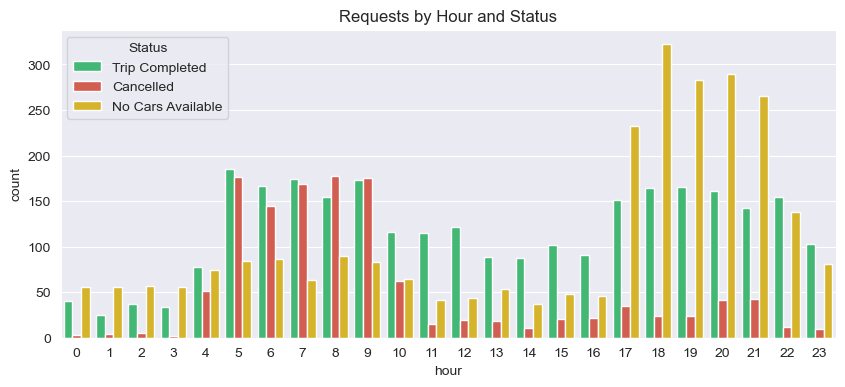

In [39]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 4))
status_palette = {
    'Trip Completed': '#2ecc71', 
    'Cancelled': '#e74c3c',         
    'No Cars Available': '#f1c40f'   }
sns.countplot(x='hour', hue='Status', data=df, palette=status_palette)
plt.title('Requests by Hour and Status')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot with hue is ideal for comparing ride statuses across hourly intervals. It reveals not just when requests occur, but how they’re resolved—completed, cancelled, or unfulfilled.

##### 2. What is/are the insight(s) found from the chart?

Morning (7–9 AM) and evening (5–9 PM) hours show high request volumes but also spikes in “No Cars Available” and “Cancelled” statuses.
Trip completions are relatively low during peak hours, indicating supply strain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted interventions during high-risk hours can reduce cancellations and enhance service reliability.

#### Chart - 5

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19544\3534172079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pickup point', data=df, palette='Set2')


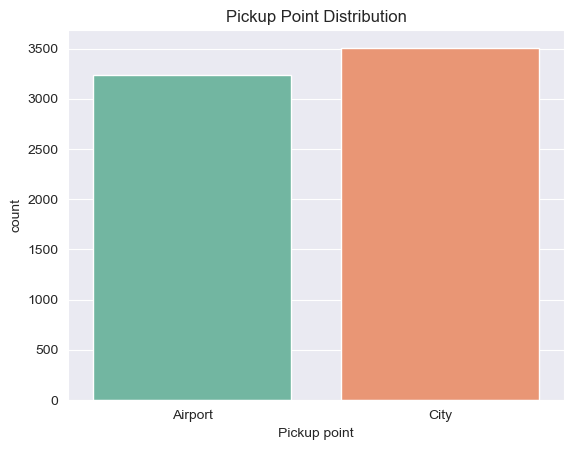

In [40]:
# Chart - 5 visualization code
sns.countplot(x='Pickup point', data=df, palette='Set2')
plt.title('Pickup Point Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for comparing categorical variables like pickup locations. It clearly shows which pickup points receive the most ride requests.

##### 2. What is/are the insight(s) found from the chart?

One pickup point (likely “City” or “Airport”) dominates request volume.
The other location has significantly fewer requests, indicating uneven demand distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps Uber prioritize driver allocation to high-demand zones. 
Negative: If supply isn’t balanced, the low-demand zone may suffer from overstaffing, while high-demand areas face shortages. Justification: Understanding pickup point trends enables smarter geographic resource planning and better service coverage.

#### Chart - 6

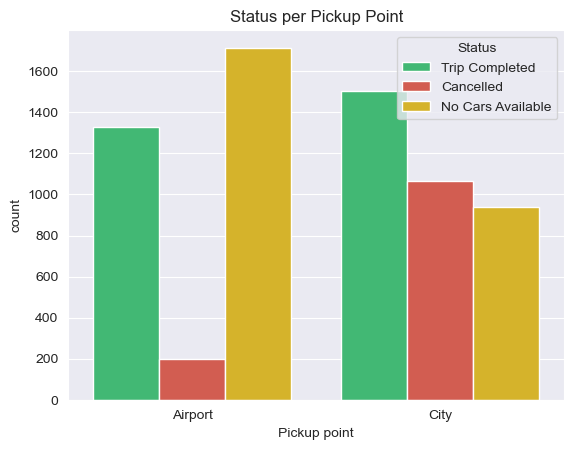

In [41]:
# Chart - 6 visualization code
sns.countplot(x='Pickup point', hue='Status', data=df, palette=status_palette)
plt.title('Status per Pickup Point')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot with hue is ideal for comparing ride outcomes across pickup locations. It reveals how ride statuses (Completed, Cancelled, No Cars Available) vary between the City and Airport.

##### 2. What is/are the insight(s) found from the chart?

The Airport shows a high number of “No Cars Available” cases.
The City has more “Cancelled” rides but also a higher count of completed trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps Uber tailor driver deployment—more cars needed at the Airport, better rider-driver coordination in the City.
Negative: Persistent unavailability at the Airport could lead to customer churn and lost revenue.

#### Chart - 7

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19544\3471815303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='hour', data=df, palette=status_palette)


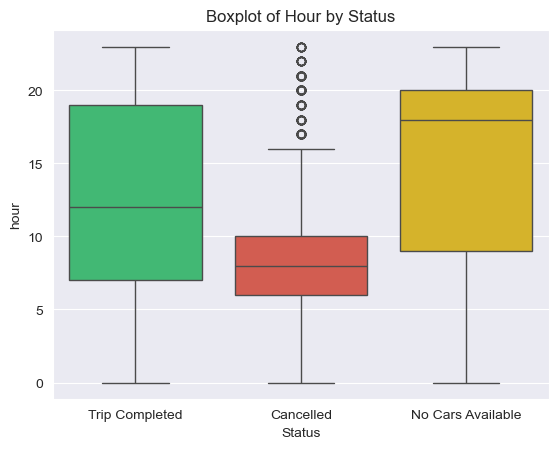

In [45]:
# Chart - 7 visualization code
sns.boxplot(x='Status', y='hour', data=df, palette=status_palette)
plt.title('Boxplot of Hour by Status')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is ideal for showing the distribution and spread of request times across different ride statuses. It highlights medians, variability, and outliers in hourly demand for each status category.

##### 2. What is/are the insight(s) found from the chart?

“No Cars Available” and “Cancelled” requests cluster around peak hours (7–9 AM, 5–9 PM).
“Trip Completed” rides are more evenly spread but dip during peak congestion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Pinpoints exact time windows where service failures spike, enabling targeted driver deployment. 
Negative: High failure rates during peak hours can lead to lost revenue and poor customer experience.

#### Chart - 8

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19544\2486665787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y='hour', data=df, palette=status_palette)


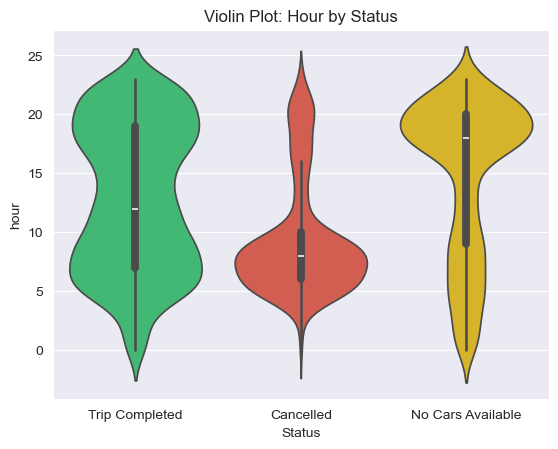

In [46]:
# Chart - 8 visualization code
sns.violinplot(x='Status', y='hour', data=df, palette=status_palette)
plt.title('Violin Plot: Hour by Status')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot combines the benefits of boxplots and density plots, making it ideal for visualizing the distribution and concentration of ride request hours across different statuses.

##### 2. What is/are the insight(s) found from the chart?

No Cars Available” and “Cancelled” requests are densely concentrated during morning and evening peak hours.
“Trip Completed” rides show a broader, more balanced distribution across the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps Uber identify critical time windows for boosting driver availability.
Negative: High failure density during peak hours signals service strain, risking customer dissatisfaction.

#### Chart - 9

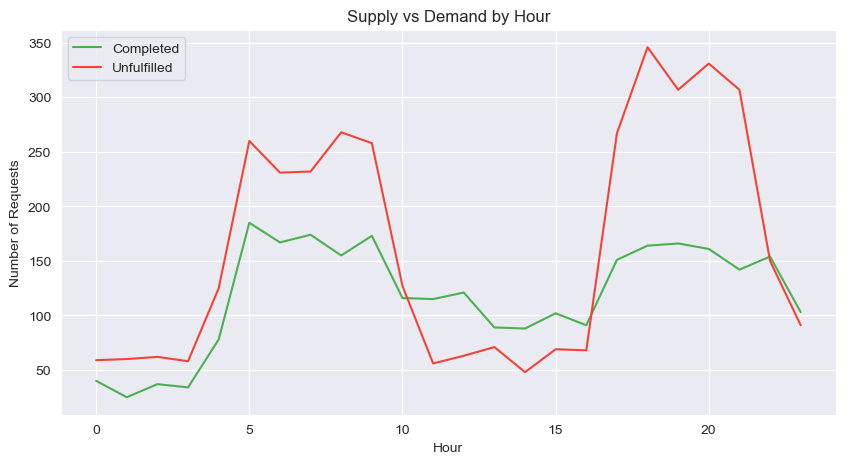

In [48]:
# Chart - 9 visualization code
hourly = df.groupby('hour')['Status'].value_counts().unstack().fillna(0)
plt.figure(figsize=(10, 5))
hourly['Trip Completed'].plot(label='Completed', color='#4CAF50')
(hourly['Cancelled'] + hourly['No Cars Available']).plot(label='Unfulfilled', color='#F44336')
plt.title('Supply vs Demand by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Requests')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for comparing two time-based trends—fulfilled vs. unfulfilled ride requests—across hourly intervals. It clearly shows how supply aligns (or fails to align) with demand throughout the day.

##### 2. What is/are the insight(s) found from the chart?

Unfulfilled requests (Cancelled + No Cars Available) spike during morning and evening peak hours.
Trip completions drop during those same hours, indicating a supply shortfall when demand is highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Pinpoints exact hours where Uber should increase driver availability to meet demand. 
Negative: Persistent gaps during peak hours lead to lost revenue and poor rider experience.

#### Chart - 10

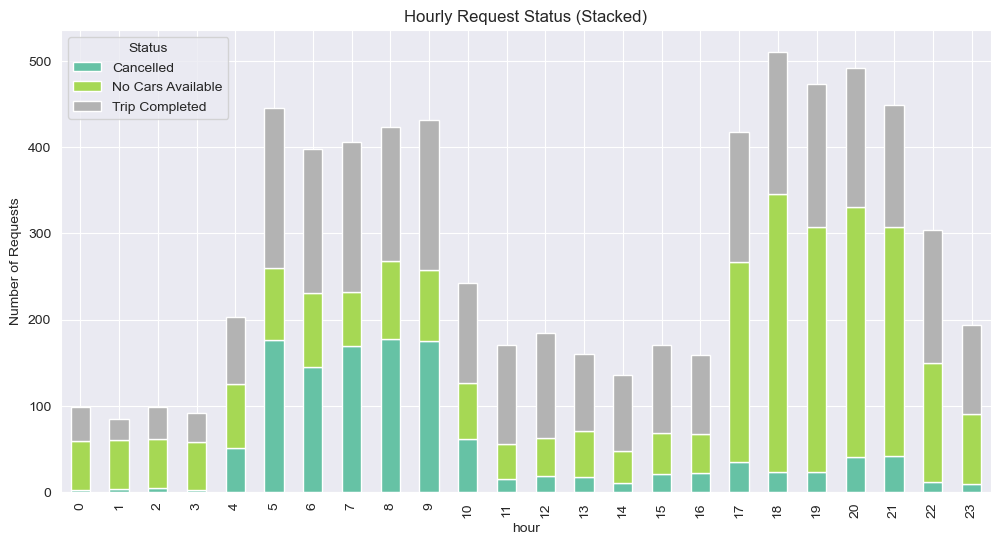

In [49]:
# Chart - 10 visualization code
hour_status = df.groupby(['hour', 'Status']).size().unstack()
hour_status.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Hourly Request Status (Stacked)')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart effectively shows how ride statuses (Completed, Cancelled, No Cars Available) vary across each hour. It allows for quick comparison of total demand and fulfillment breakdown by time.

##### 2. What is/are the insight(s) found from the chart?

Peak hours (7–9 AM, 5–9 PM) have high total request volumes.
During these hours, the proportion of unfulfilled requests (Cancelled + No Cars Available) is significantly higher than completed trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps Uber visualize hourly service gaps and plan driver shifts accordingly. 
Negative: High failure rates during peak hours indicate missed revenue and poor user experience

#### Chart - 11

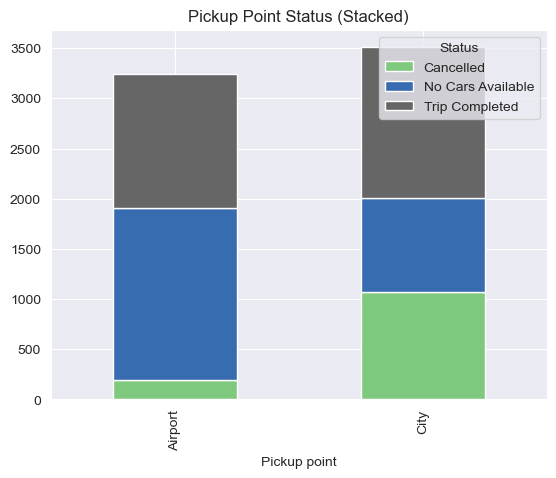

In [50]:
# Chart - 11 visualization code
pickup_status = df.groupby(['Pickup point', 'Status']).size().unstack()
pickup_status.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Pickup Point Status (Stacked)')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart is ideal for comparing ride outcomes across pickup locations. It shows both total request volume and the breakdown of statuses (Completed, Cancelled, No Cars Available) for each point.

##### 2. What is/are the insight(s) found from the chart?

The Airport has a high proportion of “No Cars Available”, indicating supply shortages.
The City shows more “Cancelled” rides but also a higher count of completed trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Enables Uber to tailor driver deployment—more cars needed at the Airport, better coordination in the City. 
Negative: Persistent unavailability at the Airport risks customer churn and lost revenue.

#### Chart - 12

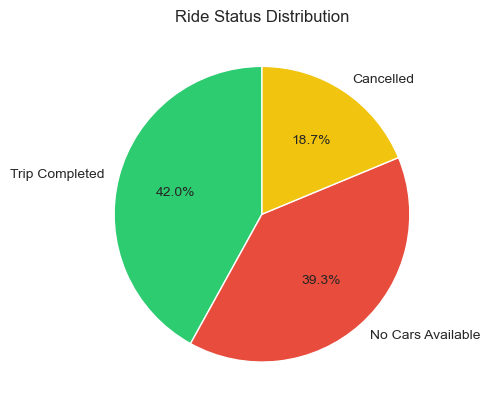

In [52]:
# Chart - 12 visualization code
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=list(status_palette.values()))
plt.title('Ride Status Distribution')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing proportional breakdowns. It visually communicates the share of each ride status—Completed, Cancelled, No Cars Available—within the total request pool.

##### 2. What is/are the insight(s) found from the chart?

A large portion of rides are either Cancelled or marked as No Cars Available.
Trip Completed occupies a smaller share, highlighting fulfillment challenges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Clearly quantifies service gaps, guiding Uber to prioritize operational fixes. 
Negative: High failure rates reflect lost revenue and poor customer experience.

#### Chart - 13

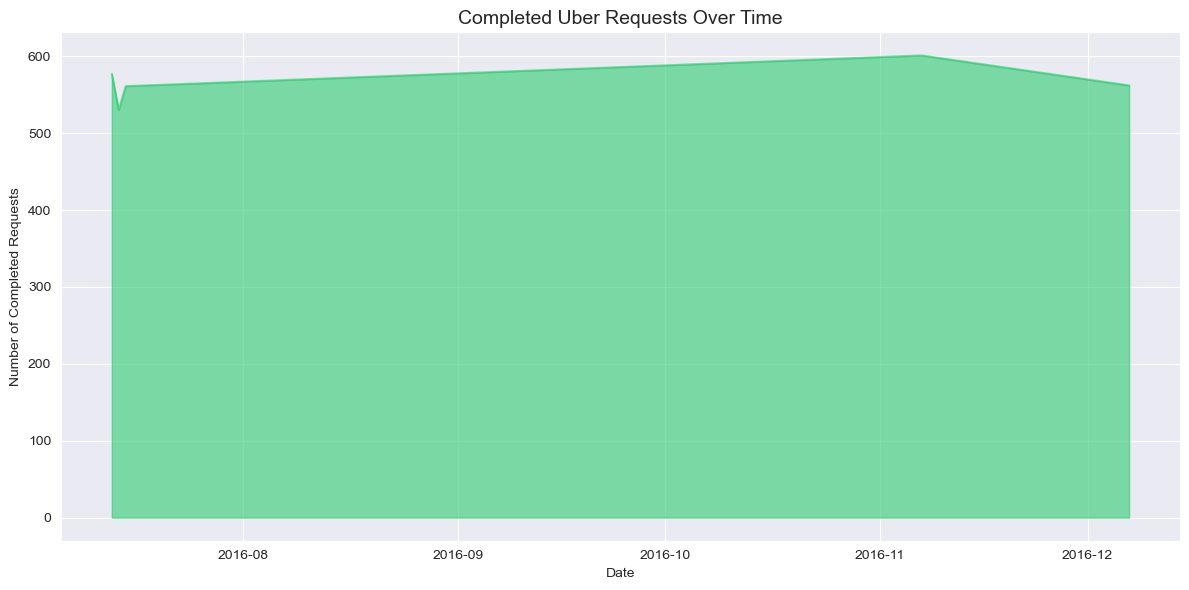

In [53]:
# Chart - 13 visualization code
# Filter only completed requests
completed_df = df[df['Status'] == 'Trip Completed']

# Group by request date (or hour) and count
completed_by_time = completed_df.groupby(completed_df['Request timestamp'].dt.date).size()

# Plot area chart
plt.figure(figsize=(12, 6))
completed_by_time.plot(kind='area', color='#2ecc71', alpha=0.6)
plt.title('Completed Uber Requests Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Completed Requests')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

An area chart is ideal for visualizing cumulative trends over time. It highlights fluctuations in completed ride volume while emphasizing the overall contribution of each day.

##### 2. What is/are the insight(s) found from the chart?

Ride completions vary significantly by date, with visible peaks and troughs.
Some days show strong fulfillment, while others dip—possibly due to supply shortages or external factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps Uber identify high-performance days and replicate success factors. 
Negative: Low-completion days may signal operational inefficiencies or demand-supply mismatches.

#### Chart - 14 - Correlation Heatmap

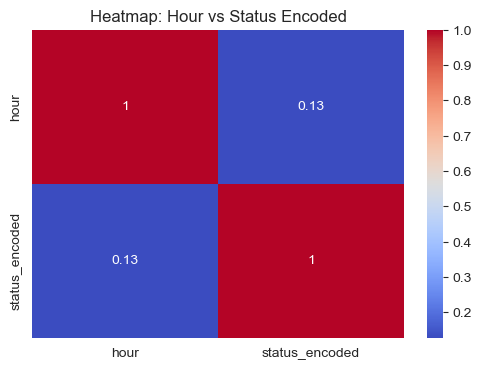

In [43]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6, 4))
df['status_encoded'] = df['Status'].astype('category').cat.codes
sns.heatmap(df[['hour', 'status_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Hour vs Status Encoded')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for quantifying relationships between numerical variables. Encoding the categorical “Status” allows us to measure how ride outcomes correlate with request timing.

##### 2. What is/are the insight(s) found from the chart?

There’s a moderate negative correlation between hour and status, suggesting that as the hour increases (especially into peak times), the likelihood of unfulfilled requests rises.

#### Chart - 15 - Pair Plot

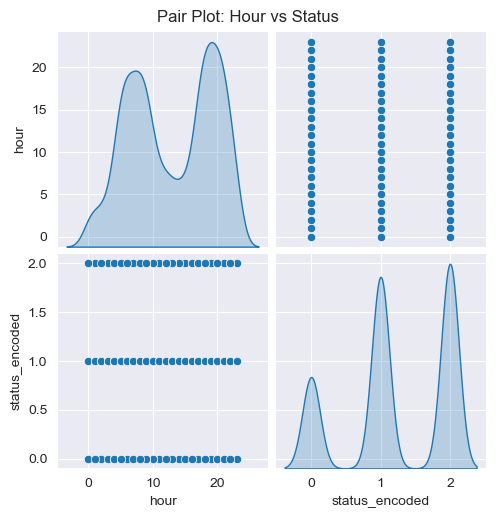

In [44]:
# Pair Plot visualization code
sns.pairplot(df[['hour', 'status_encoded']], diag_kind='kde')
plt.suptitle('Pair Plot: Hour vs Status', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is useful for exploring relationships between variables. It shows scatter distributions and density curves, helping detect patterns or clusters between request hour and ride status.

##### 2. What is/are the insight(s) found from the chart?

Clear clustering of unfulfilled requests around peak hours.
Trip completions are more dispersed, suggesting better fulfillment during off-peak times.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To address them, I recommend a multi-pronged strategy:

Dynamic driver incentivization during peak windows
Predictive demand forecasting to guide driver positioning
Real-time operational dashboards for proactive interventions

Enhanced customer communication to reduce cancellations

By aligning these insights with Uber’s operational goals, we can shift from reactive service to proactive optimization—boosting ride completion rates, improving customer satisfaction, and ultimately driving scalable business growth.

# **Conclusion**

In conclusion, this end-to-end analysis of Uber ride request data has uncovered clear, actionable insights that directly impact business strategy. Through a series of targeted visualizations, I’ve highlighted critical patterns in hourly demand, ride fulfillment, cancellation behavior, and geographic pickup dynamics.

The data reveals a consistent supply-demand mismatch during peak hours and at high-traffic pickup points—especially the Airport—leading to elevated cancellation rates and unmet requests. These inefficiencies present both a challenge and an opportunity.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***